# Grid of Points with Peril Noise 


In [1]:
import noise
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_2d_perlin(n_x, n_y, scale=1, **kwargs):
    """Generate a 2D array of Perlin noise.

    Parameters:
        n_x (int): The number of columns in the generated noise array.
        n_y (int): The number of rows in the generated noise array.
        scale (float, optional): A scaling factor for the noise. Default is 1.
        **kwargs: Additional keyword arguments to pass to the ``noise.pnoise2`` function.

    Returns:
        numpy.ndarray: A 2D array of shape (n_y, n_x) containing Perlin noise values.

    """

    # Largest dimension - use to scale values
    max_n = max(n_y, n_x)

    # Create grid of points to plot
    x = np.linspace(0, n_x, n_x) / (max_n * scale)
    y = np.linspace(0, n_y, n_y) / (max_n * scale)
    points_x, points_y = np.meshgrid(x, y) # grid

    # Create an array for holding Perlin noise y coordinates correspond to the rows
    perlin_data = np.zeros((n_y, n_x))

    # Compute noise using indices of the array
    for i in range(n_y):
        for j in range(n_x):
            perlin_data[i, j] = noise.pnoise2(
                points_x[i, j], points_y[i, j],
                **kwargs
            )

    # Shift Perlin noise so >= 0 so can use to control size
    min_perlin = np.min(perlin_data)
    perlin_data = perlin_data + np.abs(min_perlin)

    return points_x, points_y, perlin_data

In [3]:
def plot_perlin_art(points_x, points_y, s=25, c=None, cmap="viridis", fig=None, ax=None, show_plot=True):
    """Plot a gird of points with Perlin noise."""

    if fig is None or ax is None:
        fig, ax = plt.subplots(1, 1)

    ax.scatter(
        points_x, points_y,
        s=s,
        c=c,
        cmap=cmap if c is not None else None,
    )

    ax.axis("off")
    ax.set_aspect("equal")

    if show_plot:
        plt.show()

    return fig, ax

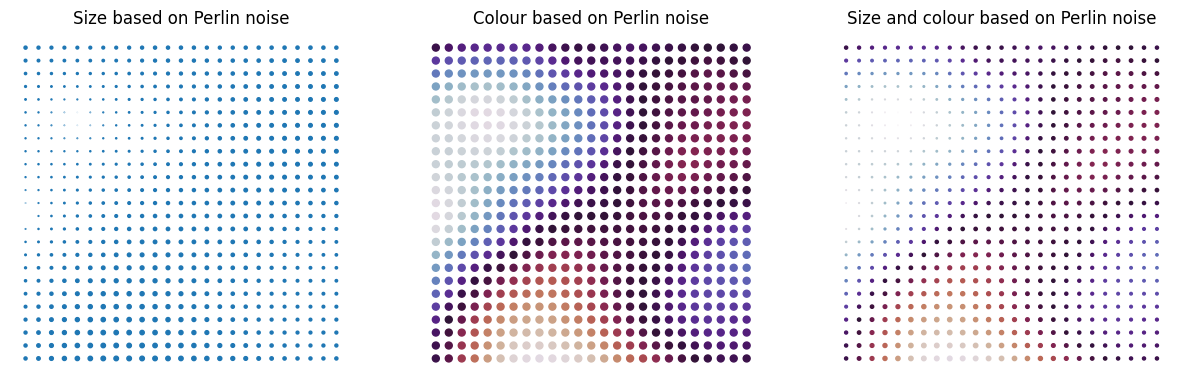

In [4]:
# Create grid of points to plot
n_x = 25
n_y = 25
scale = 1

octaves = 8
persistence = 0.2
base = 10

points_x, points_y, perlin_data = generate_2d_perlin(
    n_x, n_y,
    scale=scale,
    octaves=octaves,
    persistence=persistence,
    base=base
)

# Figure settings
size_multiplier = 25 # multiplier for size of points
cmap = "twilight" # colourmap

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

fig, ax = plot_perlin_art(points_x, points_y, s=(perlin_data * size_multiplier), cmap=cmap, fig=fig, ax=axes[0], show_plot=False)
ax.set_title("Size based on Perlin noise")

fig, ax = plot_perlin_art(points_x, points_y, s=size_multiplier, c=(perlin_data * size_multiplier), cmap=cmap, fig=fig, ax=axes[1], show_plot=False)
ax.set_title("Colour based on Perlin noise")

fig, ax = plot_perlin_art(points_x, points_y, s=(perlin_data * size_multiplier), c=(perlin_data * size_multiplier), cmap=cmap, fig=fig, ax=axes[2], show_plot=False)
ax.set_title("Size and colour based on Perlin noise")

plt.show()